In [1]:
#https://www.reddit.com/r/Julia/comments/qijlpx/how_to_import_an_own_module_from_the_current/

push!(LOAD_PATH, pwd())

import Tools

println(Tools.doubler(8))
println(Tools.trippler(30))

16
90


In [2]:
using Peaks
using PyCall
np = pyimport("numpy")
math = pyimport("math")

PyObject <module 'math' (built-in)>

In [104]:
function get_set_of_arrays(sample_size,examples,pulse_no,file_name)
    """
    This function takes required sample size and desired
    number of examples and returns empty arrays for MC data
    creation
    """
    full_shapes = np.load(file_name);
    full_shapes = reshape(full_shapes,sample_size,floor(Int,length(full_shapes)/sample_size));
    full_shapes = transpose(full_shapes);
    
    data = zeros(Int8,examples,sample_size)
    target = zeros(Int8,examples,sample_size)
    place= rand(1:sample_size,examples,pulse_no)
    selected_shapes = rand(1:size(full_shapes,1),examples,pulse_no)
    sel_sh = []
    for i in 1:size(selected_shapes,1)
        sh=selected_shapes[i,:]
        s = [filter(>(0),full_shapes[i,:]) for i in sh]
        push!(sel_sh,s)
        println(s)
    end
    return data, target, place, sel_sh
end
sample_size=100;
examples=2;
pulse_no=5
file_name = "uniq_samp_all.npy"
a1,a2,a3,a4=get_set_of_arrays(sample_size,examples,pulse_no,file_name);# 

Vector{Int8}[[11, 12, 7, 4, 1], [5, 9, 7, 3, 1], [8, 29, 27, 16, 8, 5, 2], [2, 32, 35, 22, 12, 5, 4, 1, 1], [17, 24, 16, 9, 4, 2]]
Vector{Int8}[[4, 25, 24, 14, 7, 3, 2], [1, 1], [1, 1], [8, 10, 6, 3, 1], [26, 32, 22, 12, 5, 3, 1, 1]]


In [111]:
print(size(a1),size(a2),size(a3),size(a4))

(2, 100)(2, 100)(2, 5)(2,)

In [132]:
for i in 1:size(a1,1)
    arr = a1[i,:]
    tar = a2[i,:]
    place = a3[i,:]
    pul = a4[i]
    for (j,k) in zip(place,pul)
        println(j," ",k)
    end
end

27 Int8[11, 12, 7, 4, 1]
81 Int8[5, 9, 7, 3, 1]
100 Int8[8, 29, 27, 16, 8, 5, 2]
92 Int8[2, 32, 35, 22, 12, 5, 4, 1, 1]
95 Int8[17, 24, 16, 9, 4, 2]
81 Int8[4, 25, 24, 14, 7, 3, 2]
82 Int8[1, 1]
95 Int8[1, 1]
91 Int8[8, 10, 6, 3, 1]
13 Int8[26, 32, 22, 12, 5, 3, 1, 1]


In [164]:
using Peaks
sz = 100
list = [11, 12, 7, 4, 1]
pos = 50
pks, vals = findmaxima(list)
diff = length(list)-pks[1]+1# 1 is used to count position of point itself
from_add_point = pos+diff

final_point = from_add_point
first_point = pos
shape = list
auc_r = np.trapz(shape)/np.trapz(shape) # because 100% auc is added

1.0

In [167]:
using Peaks
sz = 100
list = [11, 12, 7, 4, 1]
pos = 99
pks, vals = findmaxima(list)
diff = length(list)-pks[1]+1# 1 is used to count position of point itself
from_add_point = pos+diff
if from_add_point>100
    final_point = 100
    first_point = pos
    shape = list[1:pks[1]]
    auc_r = np.trapz(shape)/np.trapz(list) # because 100% auc is added
end

0.39655172413793105

In [196]:
using Peaks
sz = 100
list = [11, 12, 7, 4, 1]
pos = 1
pks, vals = findmaxima(list)
diff = pos-pks[1]+1
from_add_point = pos+diff

if from_add_point<=1
    shape = list[abs(diff)+2:size(list,1)]
    final_point = size(shape,1)
    first_point = 1
    auc_r = np.trapz(shape)/np.trapz(list) # because 100% auc is added
end

0.603448275862069

In [207]:
function func(sz,list,pos)
    pks, vals = findmaxima(list)
    diff = pos-pks[1]+1
    from_add_point = pos+diff
    if from_add_point<=1
        println("case-1")
        shape = list[abs(diff)+2:size(list,1)]
        final_point = size(shape,1)
        first_point = 1
        auc_r = np.trapz(shape)/np.trapz(list) 
    elseif from_add_point>100
        println("case-2")
        final_point = 100
        first_point = pos
        shape = list[1:pks[1]]
        auc_r = np.trapz(shape)/np.trapz(list) 
    else
        println("case-3")
        final_point = from_add_point
        first_point = pos
        shape = list
        auc_r = np.trapz(shape)/np.trapz(shape) 
    end
    return first_point,final_point,shape,auc_r
end

func (generic function with 1 method)

In [208]:
sz = 100
list = [11, 12, 7, 4, 1]
pos = 95
pks, vals = findmaxima(list)
q,w,e,r = func(sz,list,pos)

case-2


(95, 100, [11, 12], 0.39655172413793105)

In [70]:
a4[1,:]

5-element Vector{Int64}:
 201370
 164115
 149090
 371845
 172141

In [25]:
full_shapes = np.load("uniq_samp_all.npy");
full_shapes = reshape(full_shapes,100,floor(Int,length(full_shapes)/100));
full_shapes = transpose(full_shapes);
print(size(full_shapes, 1))

444447

In [63]:
q = full_shapes[3,:]
filter(>(0),q)
filter(>(0),full_shapes[3,:])

5-element Vector{Int8}:
 2
 5
 4
 2
 1

In [73]:
lists = [234,456,1,3,49,789]
s = [filter(>(0),full_shapes[i,:]) for i in lists]

6-element Vector{Vector{Int8}}:
 [11, 28, 24, 14, 6, 3, 1, 1]
 [5, 14, 13, 8, 4, 1]
 [8, 13, 9, 5, 2]
 [2, 5, 4, 2, 1]
 [1, 2, 1]
 [11, 13, 8, 4, 1]

In [84]:
q1 = [filter(>(0),full_shapes[i,:]) for i in [a4[j,:] for j in 1:size(a4,1)]]
print(size(q1))

(2,)

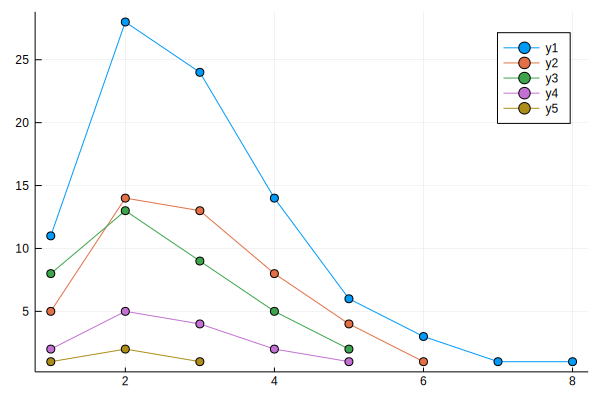

In [78]:
Plots.plot(s[1],markershape=:circle)
plot!(s[2],markershape=:circle)
plot!(s[3],markershape=:circle)
plot!(s[4],markershape=:circle)
plot!(s[5],markershape=:circle)

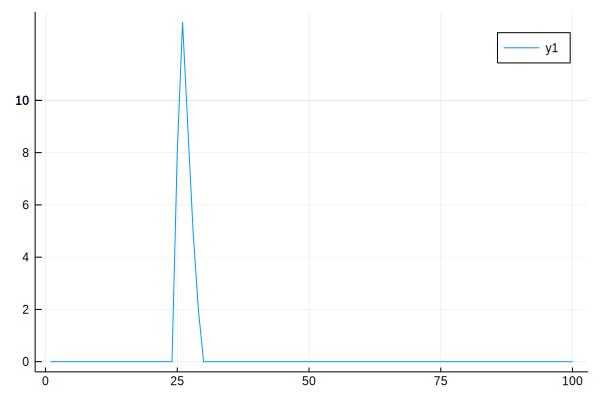

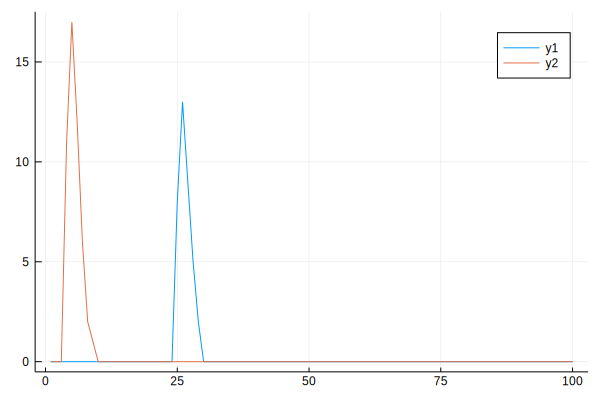

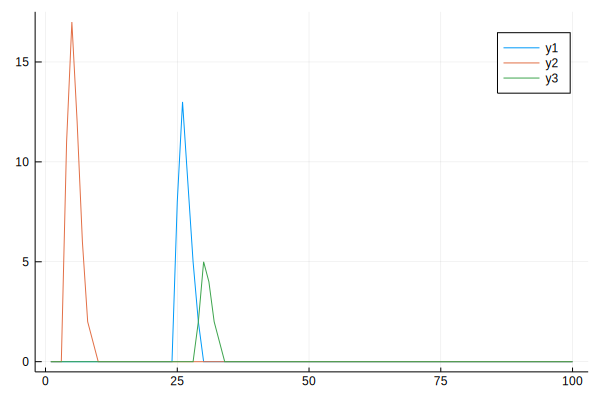

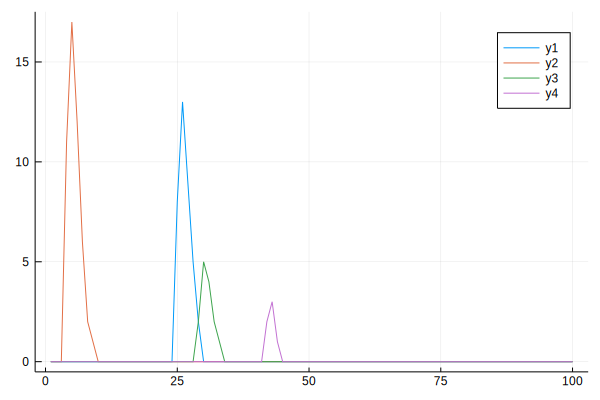

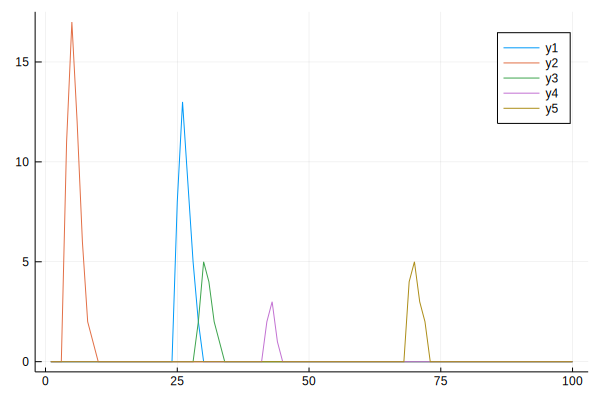

In [7]:
using Plots
for i in 1:5
    arr = full_shapes[i,:]
    #println(arr)
    display(Plots.plot!(arr))
end

In [25]:
for i in 1:10
    println(rand(0:100,2,i))
end

[87; 15;;]
[31 29; 13 68]
[77 36 52; 75 81 7]
[64 28 17 48; 32 47 91 67]
[17 76 67 92 77; 48 73 96 28 25]
[89 53 90 69 26 9; 32 64 73 48 33 79]
[99 75 36 61 12 60 20; 46 63 23 16 74 59 42]
[91 5 1 34 28 16 21 73; 66 42 100 44 6 92 23 6]
[34 1 19 22 54 58 21 100 96; 33 40 82 7 36 96 4 11 81]
[43 55 31 44 12 4 58 57 52 1; 26 88 48 3 65 95 10 55 29 59]


In [26]:
rand(1:100,10,2)

10×2 Matrix{Int64}:
 22  65
 97  53
 85  19
 81   5
 92  92
  4  95
 97  90
 16  40
 37  30
 86  44

(100,)

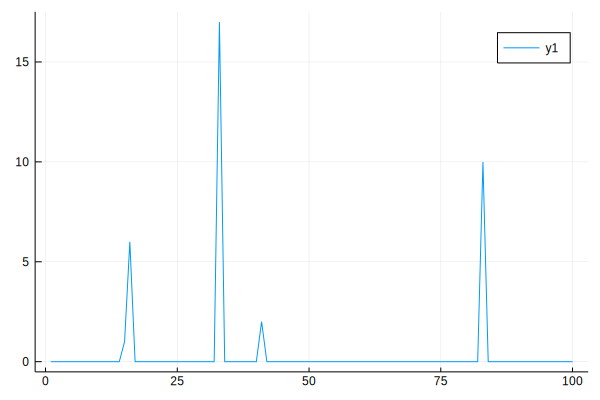

In [97]:
using Plots
print(size(full_shapes[:1,:]))
Plots.plot(full_shapes[:1,:])

In [9]:
a = rand(Int8,10);
print(size(a))
b = reshape(a,2,5)

(10,)

2×5 Matrix{Int8}:
 82   44  -122  -63  34
 -5  -45   102  -83  42

In [22]:
a[1]

0.3830684908403815

In [23]:
a[10]

0.4686353786826023

In [32]:
# Julia program to illustrate
# the use of broadcast() method

# Getting the results of the process
# of broadcasting the function over
# the specified arrays, tuples or collections
A = [1 3; 5 7; 9 11; 13 15; 17 19]
B = [2, 4, 6, 8, 10]
println(broadcast(+, A, B))
broadcast(-, A, B)


[3 5; 9 11; 15 17; 21 23; 27 29]


5×2 Matrix{Int64}:
 -1  1
  1  3
  3  5
  5  7
  7  9

In [69]:
A = zeros(Int8,20);
B = [1,2,3,4,5,6,7,8,9];
print(B.+1)

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [92]:
B[4:7,:]=B[4:7,:].+600

4×1 Matrix{Int64}:
 -596
 4169
 -594
 4171

In [93]:
B[4:7,:]=B[4:7,:].-[600,6,600,6]

4×1 Matrix{Int64}:
 -1196
  4163
 -1194
  4165

In [94]:
B

9-element Vector{Int64}:
     1
     2
     3
 -1196
  4163
 -1194
  4165
     8
     9

In [35]:
using NPZ
a1 = npzread("uniq_samp_all.npy")

┌ Info: Precompiling NPZ [15e1cf62-19b3-5cfa-8e77-841668bca605]
└ @ Base loading.jl:1423
ERROR: LoadError: SystemError: opening file "C:\\Users\\jigar\\.julia\\packages\\ZipFile\\DW0Qr\\deps\\deps.jl": No such file or directory
Stacktrace:
  [1] systemerror(p::String, errno::Int32; extrainfo::Nothing)
    @ Base .\error.jl:174
  [2] #systemerror#68
    @ .\error.jl:173 [inlined]
  [3] systemerror
    @ .\error.jl:173 [inlined]
  [4] open(fname::String; lock::Bool, read::Nothing, write::Nothing, create::Nothing, truncate::Nothing, append::Nothing)
    @ Base .\iostream.jl:293
  [5] open
    @ .\iostream.jl:282 [inlined]
  [6] open(f::Base.var"#364#365"{String}, args::String; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ Base .\io.jl:328
  [7] open
    @ .\io.jl:328 [inlined]
  [8] read
    @ .\io.jl:436 [inlined]
  [9] _include(mapexpr::Function, mod::Module, _path::String)
    @ Base .\loading.jl:1249
 [10] include(mod::Module, _path::String)
    @ Base .

LoadError: Failed to precompile NPZ [15e1cf62-19b3-5cfa-8e77-841668bca605] to C:\Users\jigar\.julia\compiled\v1.7\NPZ\jl_1DD9.tmp.

In [33]:
Pkg.add("NPZ")

   Resolving package versions...
   Installed NPZ ─ v0.4.2
    Updating `C:\Users\jigar\.julia\environments\v1.7\Project.toml`
  [15e1cf62] + NPZ v0.4.2
    Updating `C:\Users\jigar\.julia\environments\v1.7\Manifest.toml`
  [15e1cf62] + NPZ v0.4.2
Precompiling project...
  ✗ NPZ
  0 dependencies successfully precompiled in 5 seconds (259 already precompiled, 14 skipped during auto due to previous errors)
  1 dependency errored. To see a full report either run `import Pkg; Pkg.precompile()` or load the package


In [111]:
AA = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
reshape(AA,2,10)

2×10 Matrix{Int64}:
 1  3  5  7   9  11  13  15  17  19
 2  4  6  8  10  12  14  16  18  20

In [109]:
np.load("uniq_samp_all.npy")

44444700-element Vector{Int8}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [136]:
using Pkg
Pkg.add("MultivariateAnomalies")

    Updating registry at `C:\Users\jigar\.julia\registries\General.toml`
   Resolving package versions...
   Installed libsvm_jll ──────────── v3.25.0+0
   Installed ScikitLearnBase ─────── v0.5.0
   Installed LLVMOpenMP_jll ──────── v13.0.1+0
   Installed DiffEqDiffTools ─────── v1.7.0
   Installed MultivariateAnomalies ─ v0.2.4
   Installed ArrayInterface ──────── v2.14.17
   Installed Distances ───────────── v0.9.2
   Installed LIBSVM ──────────────── v0.5.0
   Installed LIBLINEAR ───────────── v0.5.1
    Updating `C:\Users\jigar\.julia\environments\v1.7\Project.toml`
  [6b1494d1] + MultivariateAnomalies v0.2.4
    Updating `C:\Users\jigar\.julia\environments\v1.7\Manifest.toml`
  [4fba245c] + ArrayInterface v2.14.17
  [01453d9d] ↑ DiffEqDiffTools v0.14.0 ⇒ v1.7.0
  [b4f34e82] ↓ Distances v0.10.7 ⇒ v0.9.2
  [2d691ee1] + LIBLINEAR v0.5.1
  [b1bec4e5] + LIBSVM v0.5.0
  [6b1494d1] + MultivariateAnomalies v0.2.4
  [6e75b9c4] + ScikitLearnBase v0.5.0
  [82ae8749] - StatsAPI v1.3.0
  [1d6

In [138]:
using MultivariateAnomalies
a = [1,2,3,4,5,6,7,6,7,4,4,2,1,3,4,2,2,3,2,3,2,3,1,1,1,1,1]
np.trapz(a)

80.0